In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
# read the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')

# see the first five rows of df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
# see the shape of df
df.shape

(10000, 14)

In [65]:
# see the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
# see the descriptive statistics of df
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [67]:
# check the null values in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
# see the duplicates values in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [69]:
# drop the irrelevant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [70]:
# check again the first five rows of df after drop the irrelevant columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

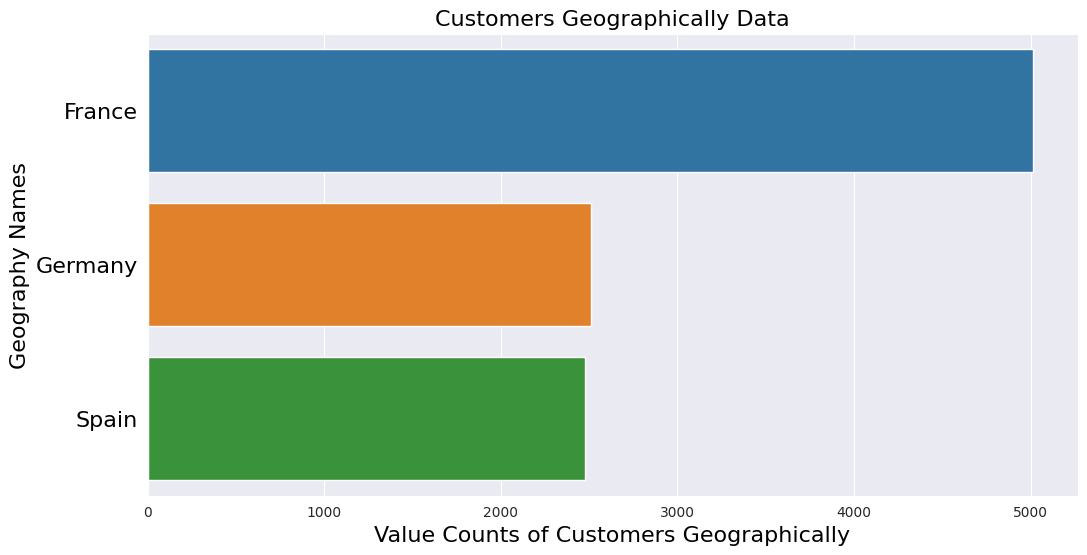

In [72]:
# now lets perform univarient eda on "Geography" column.
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_geography, y=df_geography.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

In [73]:
# check the value counts of "Gender" column.
df_gender = df['Gender'].value_counts()
df_gender

Male      5457
Female    4543
Name: Gender, dtype: int64

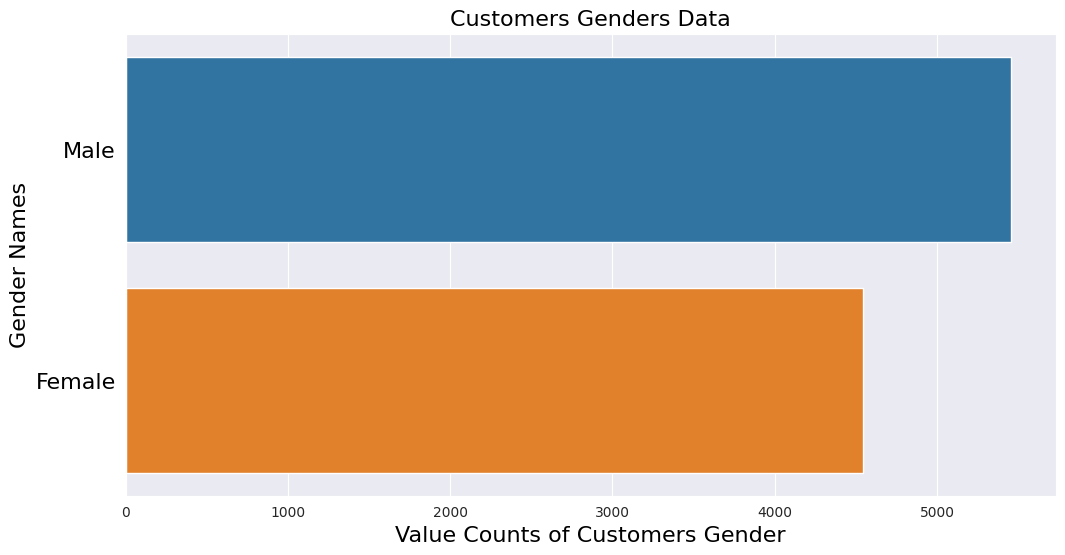

In [74]:
# let's perform univarient eda on "Gender" column.
plt.figure(figsize=(12,6))
res=sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.xlabel('Value Counts of Customers Gender',fontsize = 16, color='black')
plt.ylabel('Gender Names',fontsize = 16, color='black')
plt.title('Customers Genders Data',fontsize = 16, color='black')
plt.show()

In [75]:
# check the value counts of "number of products" column.
df_nop = df['NumOfProducts'].value_counts()
df_nop

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<ipython-input-76-01a328d1d97d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


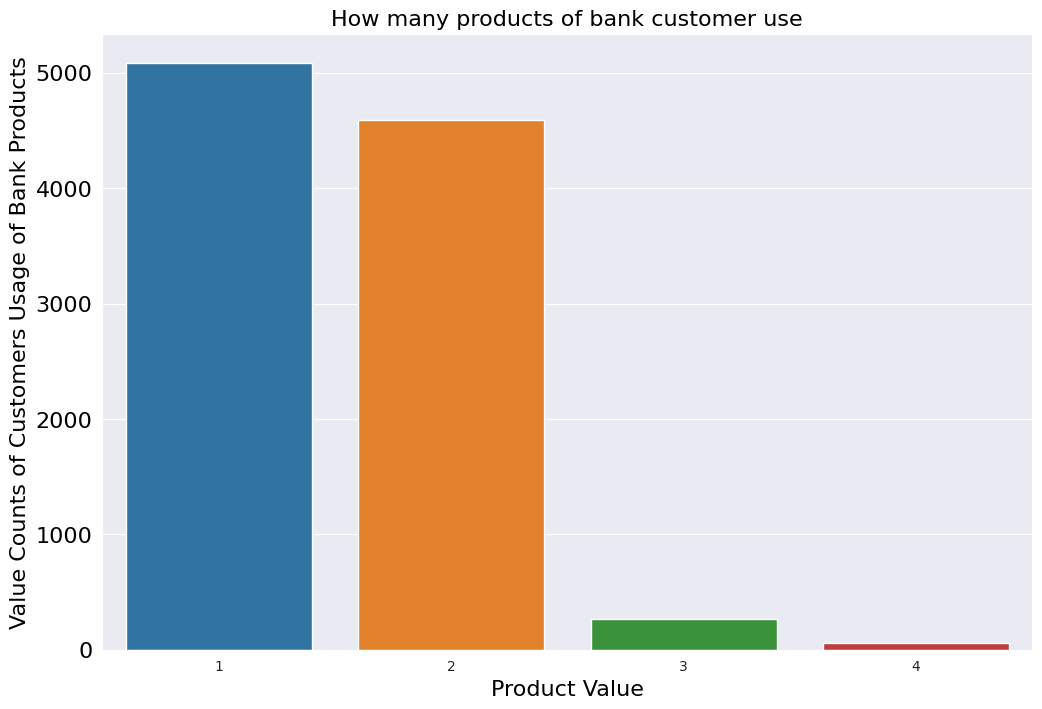

In [76]:

# let's perform univarient eda on "number of products" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_nop, x=df_nop.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Usage of Bank Products',fontsize = 16, color='black')
plt.xlabel('Product Value',fontsize = 16, color='black')
plt.title('How many products of bank customer use',fontsize = 16, color='black')
plt.show()

In [77]:
# check the value counts of "HasCrCard" column.
df_crc = df['HasCrCard'].value_counts()
df_crc

1    7055
0    2945
Name: HasCrCard, dtype: int64

<ipython-input-78-ec385fccbd4c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


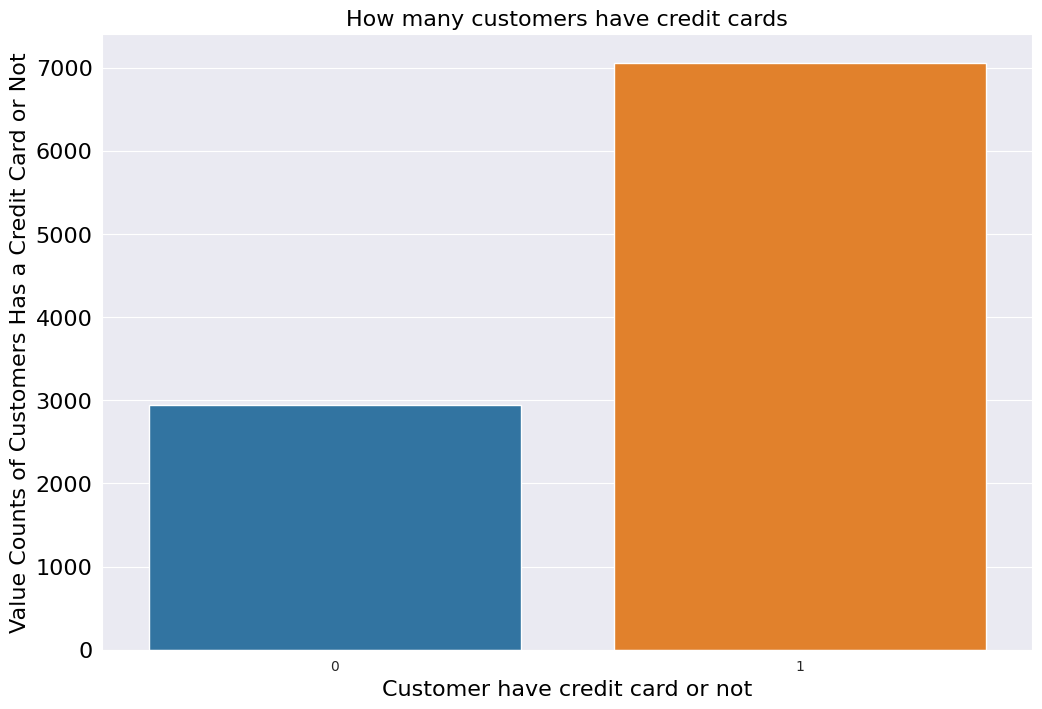

In [78]:
# let's perform univarient eda on "HasCrCard" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_crc, x=df_crc.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customers Has a Credit Card or Not',fontsize = 16, color='black')
plt.xlabel('Customer have credit card or not',fontsize = 16, color='black')
plt.title('How many customers have credit cards',fontsize = 16, color='black')
plt.show()

In [79]:
# check the value counts of "IsActiveMember" column.
df_iam = df['IsActiveMember'].value_counts()
df_iam

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<ipython-input-80-5c8e89f6ecd4>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


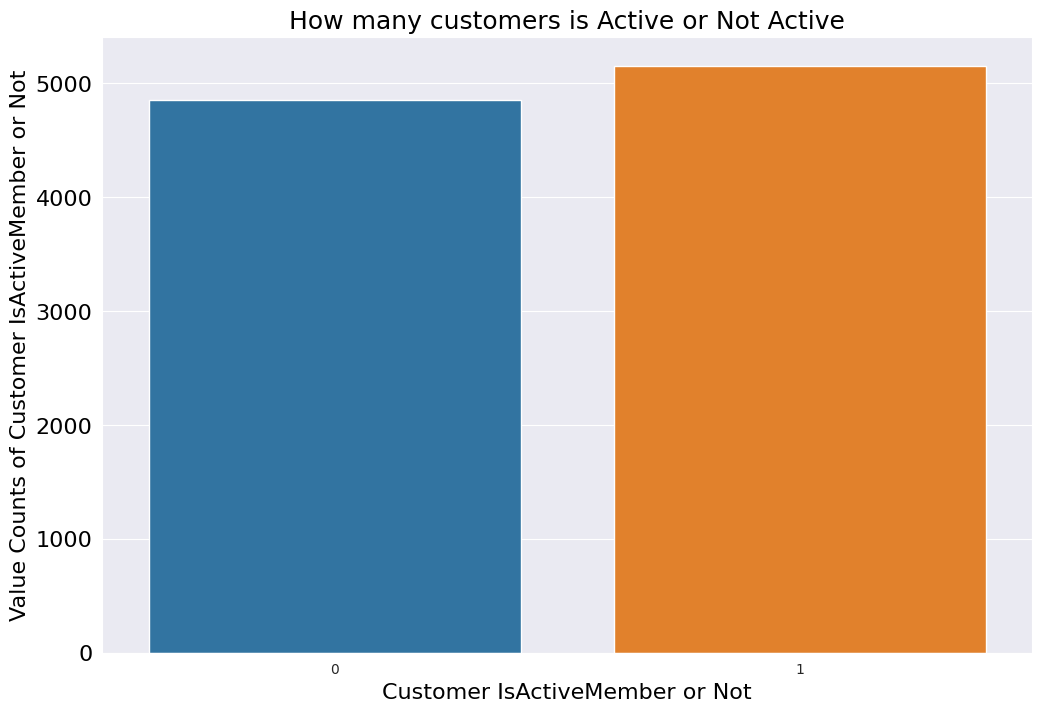

In [80]:
# let's perform univarient eda on "IsActiveMember" column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_iam, x=df_iam.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.xlabel('Customer IsActiveMember or Not',fontsize = 16, color='black')
plt.title('How many customers is Active or Not Active',fontsize = 18, color='black')
plt.show()

In [81]:
# check the value counts of "Exited" target column.
df_exit = df['Exited'].value_counts()
df_exit

0    7963
1    2037
Name: Exited, dtype: int64

<ipython-input-82-277a1453c4b3>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


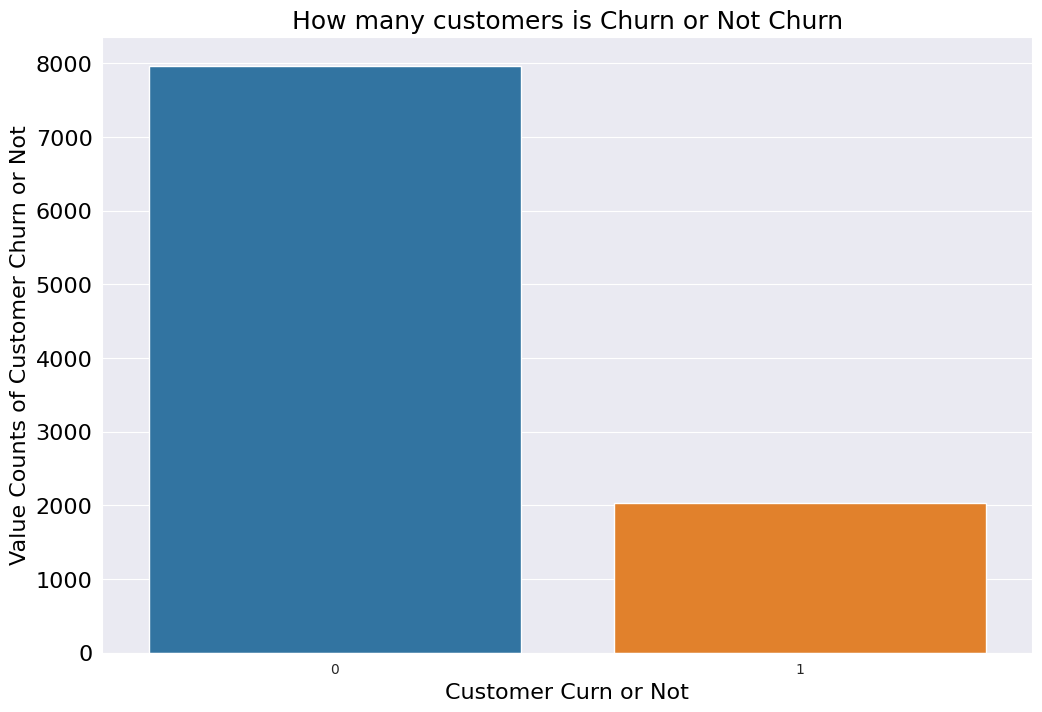

In [82]:
# # let's perform univarient eda on "Exited" target column.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

In [83]:
# use pandas dummies funtion for one hot encodeing
df = pd.get_dummies(df, columns=["Gender", "Geography"], drop_first=True)

In [84]:
# check again the df after one hot encoding method apply
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [85]:
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [86]:
# check the target_balanced_data
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,0,1,0
9337,466,47,5,102085.72,1,1,1,183536.24,1,0,1,0
4345,720,46,3,97042.60,1,1,1,133516.51,1,1,1,0
1085,803,42,5,0.00,1,1,0,196466.83,1,1,0,0


In [87]:
# see the duplicates values after the balancing the data and in dataset if exist then remove otherwise not.
df.duplicated().sum()

0

In [88]:
# check the null values after the balancing the data and in the each columns of dataset if exist then remove otherwise not.
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [89]:
# check again the value counts of "Exited" target column after the balancing the data.
df_exit = balanced_data['Exited'].value_counts()
df_exit

0    7963
1    7963
Name: Exited, dtype: int64

<ipython-input-90-319fdf4266c7>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')


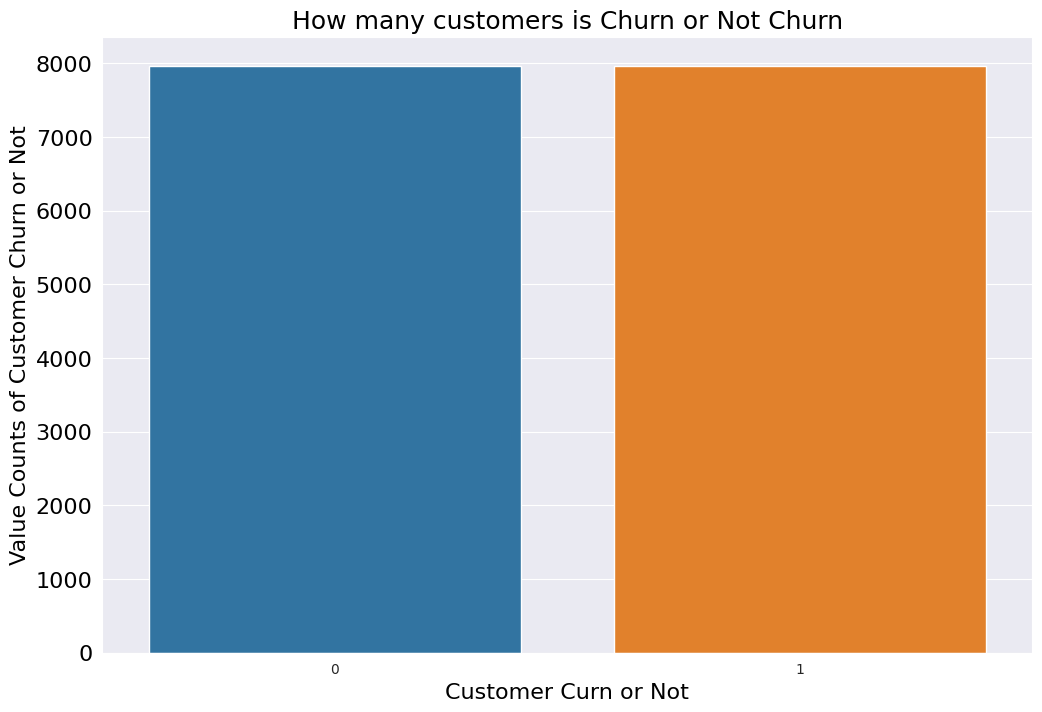

In [90]:
# # let's perform univarient eda on "Exited" target column after the balancing the data.
plt.figure(figsize=(12,8))
res=sns.barplot(y=df_exit, x=df_exit.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16, color='black')
plt.ylabel('Value Counts of Customer Churn or Not',fontsize = 16, color='black')
plt.xlabel('Customer Curn or Not',fontsize = 16, color='black')
plt.title('How many customers is Churn or Not Churn',fontsize = 18, color='black')
plt.show()

In [91]:
# # split the feature in x variable and target varible in y variable
y = balanced_data['Exited']
X = balanced_data.drop('Exited',axis=1)

In [92]:
# use sklearn for train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [93]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (12740, 11)
X_test Shape :  (3186, 11)
y_train Shape :  (12740,)
y_test Shape :  (3186,)


In [94]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# use sklearn standard scaler technique for standarized the input features values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# check the X_est_scaled values
X_test_scaled

array([[ 0.46070945,  0.45379513, -1.02083762, ...,  0.97411818,
        -0.66507036,  1.82695364],
       [-1.34698133, -0.39601459,  1.02260197, ..., -1.02656949,
        -0.66507036, -0.54735926],
       [-1.19291677, -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364],
       ...,
       [-0.11446489, -1.0569777 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-1.0799361 , -0.7737078 ,  1.02260197, ...,  0.97411818,
         1.50360032, -0.54735926],
       [-2.4665171 , -0.39601459, -1.36141088, ...,  0.97411818,
        -0.66507036,  1.82695364]])

In [97]:
# see the shape of balanced data
balanced_data.shape

(15926, 12)

In [98]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [101]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 3s 5ms/step - loss: 0.6633 - accuracy: 0.5854 - val_loss: 0.5940 - val_accuracy: 0.6927
Epoch 2/100
319/319 [==============================] - 1s 3ms/step - loss: 0.5470 - accuracy: 0.7238 - val_loss: 0.5184 - val_accuracy: 0.7402
Epoch 3/100
319/319 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.7478 - val_loss: 0.4904 - val_accuracy: 0.7586
Epoch 4/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7597 - val_loss: 0.4787 - val_accuracy: 0.7661
Epoch 5/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4768 - accuracy: 0.7643 - val_loss: 0.4719 - val_accuracy: 0.7684
Epoch 6/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7724 - val_loss: 0.4670 - val_accuracy: 0.7771
Epoch 7/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.7707 - val_loss: 0.4644 - val_accuracy: 0.7845

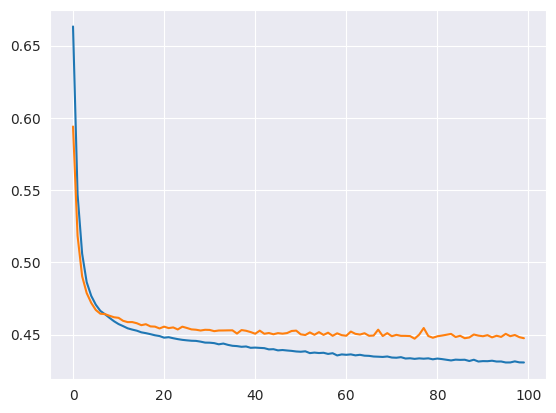

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

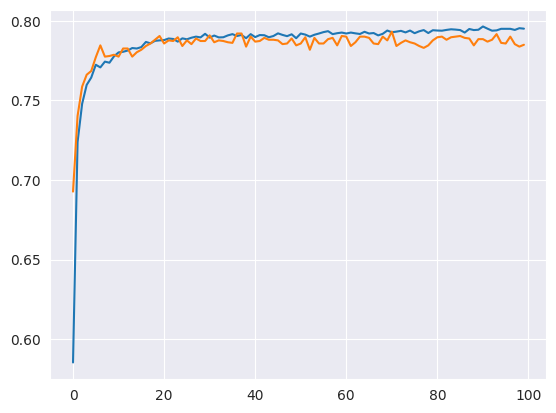

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [104]:
model.layers[0].get_weights()

[array([[-2.35984981e-01, -2.36951575e-01, -4.75460887e-02,
          5.06872013e-02,  1.30780756e-01,  9.56302136e-03,
         -1.17805287e-01, -1.43202171e-01,  1.11674428e-01,
          1.15533940e-01,  1.19239748e-01],
        [ 8.82144630e-01, -5.71272790e-01, -9.36680913e-01,
         -5.77152073e-01,  7.96343565e-01, -3.18261921e-01,
         -3.96718904e-02, -7.59795487e-01,  1.56484231e-01,
          2.09354699e-01, -8.24654281e-01],
        [-1.79103419e-01,  4.52020943e-01, -2.43060902e-01,
          2.78453708e-01,  3.07036843e-02, -4.79544222e-01,
          7.92631600e-03, -1.81062087e-01,  2.13684123e-02,
          7.54142106e-01, -3.45768571e-01],
        [-4.13504064e-01,  8.31544548e-02, -1.78597331e-01,
         -6.38520360e-01, -2.45823845e-01, -1.17120706e-01,
          1.28133923e-01,  6.69798076e-01, -1.90566495e-01,
          3.06210041e-01, -3.05198729e-01],
        [-1.01478696e+00, -1.72556370e-01,  9.93690193e-02,
         -6.08053923e-01,  5.49673140e-01,  

In [105]:
model.layers[1].get_weights()

[array([[ 0.59833664, -0.51687706,  0.12320165,  0.5086169 , -0.47855785,
         -0.34997016,  0.31036973, -0.7309146 , -0.3069923 , -0.91344655,
         -0.16089073],
        [ 0.5183423 , -0.49419683,  0.10406815,  0.12185944,  0.21449406,
          0.1311306 ,  0.639717  ,  0.7894565 ,  0.09001005,  0.43731824,
          0.2985489 ],
        [ 0.15420856, -0.7097731 , -0.08745544, -0.07727198, -0.8798037 ,
         -0.47764325,  0.40421283,  0.20540269, -0.5117575 ,  0.19339043,
          0.42001805],
        [ 0.7849853 , -0.22916576,  0.5771192 , -0.11414509,  0.17790298,
         -0.2814779 ,  0.38380706,  0.6877953 , -0.40013584,  0.44817185,
         -0.56590164],
        [-0.4391503 ,  0.30539903, -0.00827393, -0.7042787 , -0.16778784,
          0.11410023,  0.7297389 , -0.28475666, -0.09526235,  0.18626598,
          0.6230479 ],
        [-0.24317582,  0.45051193, -0.6950406 ,  0.38435003,  0.3965691 ,
          0.45977926, -0.1311313 ,  0.24257691,  0.65722555,  0.3616461

In [106]:
y_log = model.predict(X_test_scaled)

100/100 [==============================] - 0s 1ms/step


In [107]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [109]:
accuracy_score(y_test, y_pred)

0.7831136220966729